In [ ]:
!pip install asyncpraw

In [ ]:
!pip install asyncio

In [ ]:
!pip install joblib

In [ ]:
!pip install wordcloud

In [28]:
!pip install keras

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("stress.csv")
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [2]:
data["text"][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [3]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cs238\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


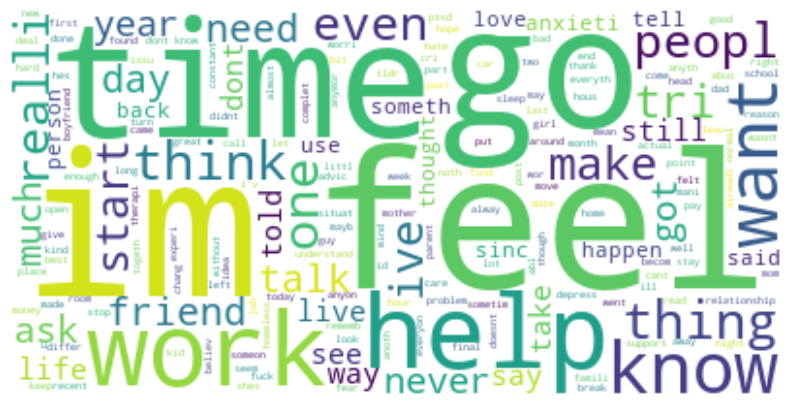

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head(20))

                                                 text      label
0   said felt way sugget go rest trigger ahead you...     Stress
1   hey rassist sure right place post goe  im curr...  No Stress
2   mom hit newspap shock would know dont like pla...     Stress
3   met new boyfriend amaz kind sweet good student...     Stress
4   octob domest violenc awar month domest violenc...     Stress
5   think doesnt want put effort relationship work...     Stress
6   big compani luckili didnt see time act though ...  No Stress
7     clear okay monday think human brain work tri...     Stress
8   actual give assist half emerg fee come help so...     Stress
9   feel like street life fuck head there much don...     Stress
10  next week i'll fli famili vacat flight won't l...     Stress
11  everyth set im almost panic attack im go dad s...     Stress
12  i'v take  mgs zoloft  month yeah super small d...     Stress
13  place citi shelter space us wont put babi lite...     Stress
14  past coupl month wors

In [6]:
X = np.array(data["text"])
y = np.array(data["label"])
len(y)

2838

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a TF-IDF vectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

BNBclassifier = BernoulliNB()
BNBclassifier.fit(X_train_tfidf, y_train)

BernoulliNB()

In [9]:
MNBclassifier = MultinomialNB()
MNBclassifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [10]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression classifier
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train_tfidf, y_train)


LogisticRegression()

In [11]:
y_predMB = MNBclassifier.predict(X_test_tfidf)
y_predBB = BNBclassifier.predict(X_test_tfidf)
y_predLR = LRclassifier.predict(X_test_tfidf)

In [12]:
from sklearn.metrics import accuracy_score

accuracyMB = accuracy_score(y_test, y_predMB)
accuracyBB = accuracy_score(y_test, y_predBB)
accuracyLR = accuracy_score(y_test, y_predLR)

In [13]:
user = input("Enter a Text:")
data = tfidf_vectorizer.transform([user]).toarray()
output = MNBclassifier.predict(data)
print(output)

Enter a Text:xzjhvzkj
['Stress']


In [14]:
accuracyMB

0.7022411953041622

In [15]:
accuracyBB

0.7577374599786553

In [16]:
accuracyLR

0.7524012806830309

In [17]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear')

model.fit(X_train_tfidf, y_train)

predicts = model.predict(X_test_tfidf)

predicts

accuracyLR = accuracy_score(y_test, predicts)
accuracyLR

0.7321237993596584

In [18]:
from sklearn.ensemble import RandomForestClassifier

knn = RandomForestClassifier(n_estimators=200)

knn.fit(X_train_tfidf, y_train)

predicts = knn.predict(X_test_tfidf)

predicts

accuracyLR = accuracy_score(y_test, predicts)
accuracyLR

0.7246531483457844

In [29]:
from transformers import TFAutoModel
from keras.saving.hdf5_format import save_attributes_to_hdf5_group
model = TFAutoModel.from_pretrained('bert-base-cased')

ModuleNotFoundError: No module named 'keras.saving.hdf5_format'

In [19]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [22]:
reddit_username = "even-wierd"
user_agent = f'Script by u/{reddit_username}'


import asyncio
import asyncpraw
import pandas as pd
import joblib

# Load your machine learning model for prediction
model = joblib.load('model.pkl')

# Define a function to process comments and make predictions
def process_comment(comment):
    # Process the comment text as needed (e.g., cleaning, feature extraction)
    # You may need to adapt this part to match your preprocessing pipeline
    text = comment.body
    # Make predictions using your model
    data = tfidf_vectorizer.transform([text]).toarray()
    prediction = model.predict(data)  
    
    label = "Stress" if prediction == "Stress" else "No Stress"

    # Print the result
    print(f"Comment: {text}")
    print(f"Prediction: {label}")

# Define your async function to monitor the subreddit
async def monitor_subreddit():
    reddit = asyncpraw.Reddit(
        client_id='aAtBsB7wlsjx-qCO4wFoNg',
        client_secret='RhdumA174UKzElGpLNuUFaebj2efbw',
        user_agent=user_agent
    )

    subreddit = await reddit.subreddit("testSubreddit288")

    async for comment in subreddit.stream.comments():
        # Process and predict for each comment
        process_comment(comment)

# Run the event loop
if __name__ == "__main__":
    await monitor_subreddit()



Comment: I am not feeling well
Prediction: No Stress
Comment: I think I need some help
Prediction: Stress
Comment: We should take care of our mental health
Prediction: No Stress
Comment: I am having Fun.
Prediction: No Stress
Comment:  **Sometime I feel like I need some help**
Prediction: Stress
Comment:  **People need to take care of their mental health**
Prediction: No Stress
Comment: positive
Prediction: No Stress
Comment: i want to kill myself
Prediction: No Stress
Comment: stress
Prediction: Stress
Comment: last night I got fired from my job. everything felt so awkward and i was in this so dark place where I couldn't see myself. I don't want to die
Prediction: No Stress
Comment:  mom hit newspap shock would know dont like
Prediction: No Stress
Comment: Manish wants to die
Prediction: No Stress
Comment: I am really happy today
Prediction: No Stress
Comment: i am happy and joyful. It's a wonderful day
Prediction: Stress
Comment: i am feeling good
Prediction: No Stress


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002256C2293F0>


CancelledError: 